# Cluster em clientes de cartão de crédito

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Importando dataaset

In [2]:
creditcard_df = pd.read_csv('D:/tudo\cluster\cartao_de_Credito\CC GENERAL.csv')

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Verificando como os dados estão classificados e se tem algum nulo.

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Conhecendo os dados

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

## Visualização e exploração dos dados

visualizando como os nulos estão distribuidos

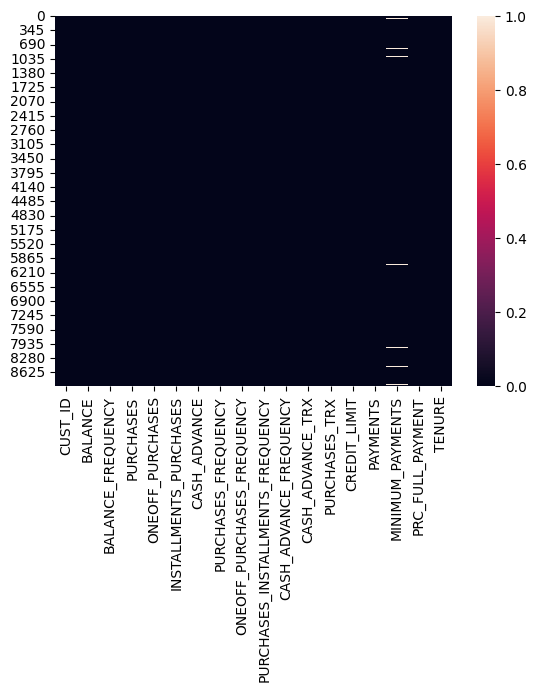

In [8]:
sns.heatmap(creditcard_df.isnull());

In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Trocando os nulos da coluna "MINIMUM_PAYMENTS" pela média da coluna.

In [10]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [11]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

Trocando os nulos da coluna "CREDIT_LIMIT" pela média da coluna.

In [12]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [13]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

Agora não teremos mais nenhum nulo.

In [14]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

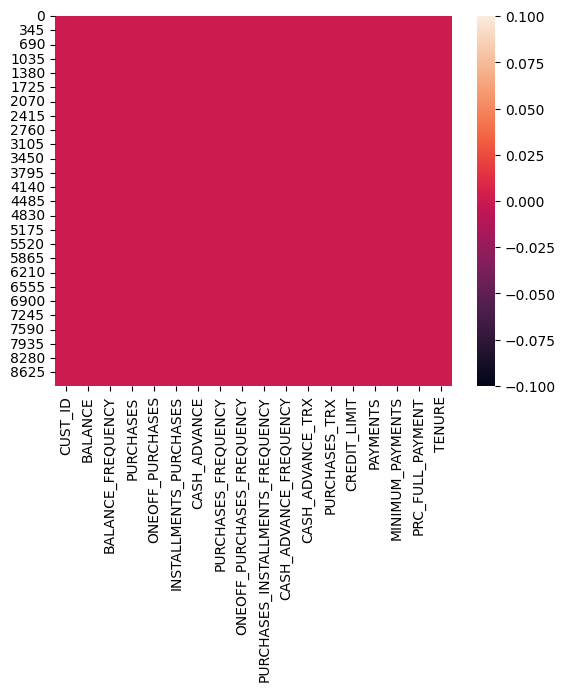

In [15]:
sns.heatmap(creditcard_df.isnull());

Colunas duplicadas?

In [16]:
creditcard_df.duplicated().sum()

0

In [17]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

Removendo a identificação dos clientes

In [18]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [20]:
len(creditcard_df.columns)

17

Plotando gráficos de todas as colunas

C:\Users\cvcam\AppData\Local\Temp\ipykernel_3524\1077679285.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
C:\Users\cvcam\AppData\Local\Temp\ipykernel_3524\1077679285.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[credi

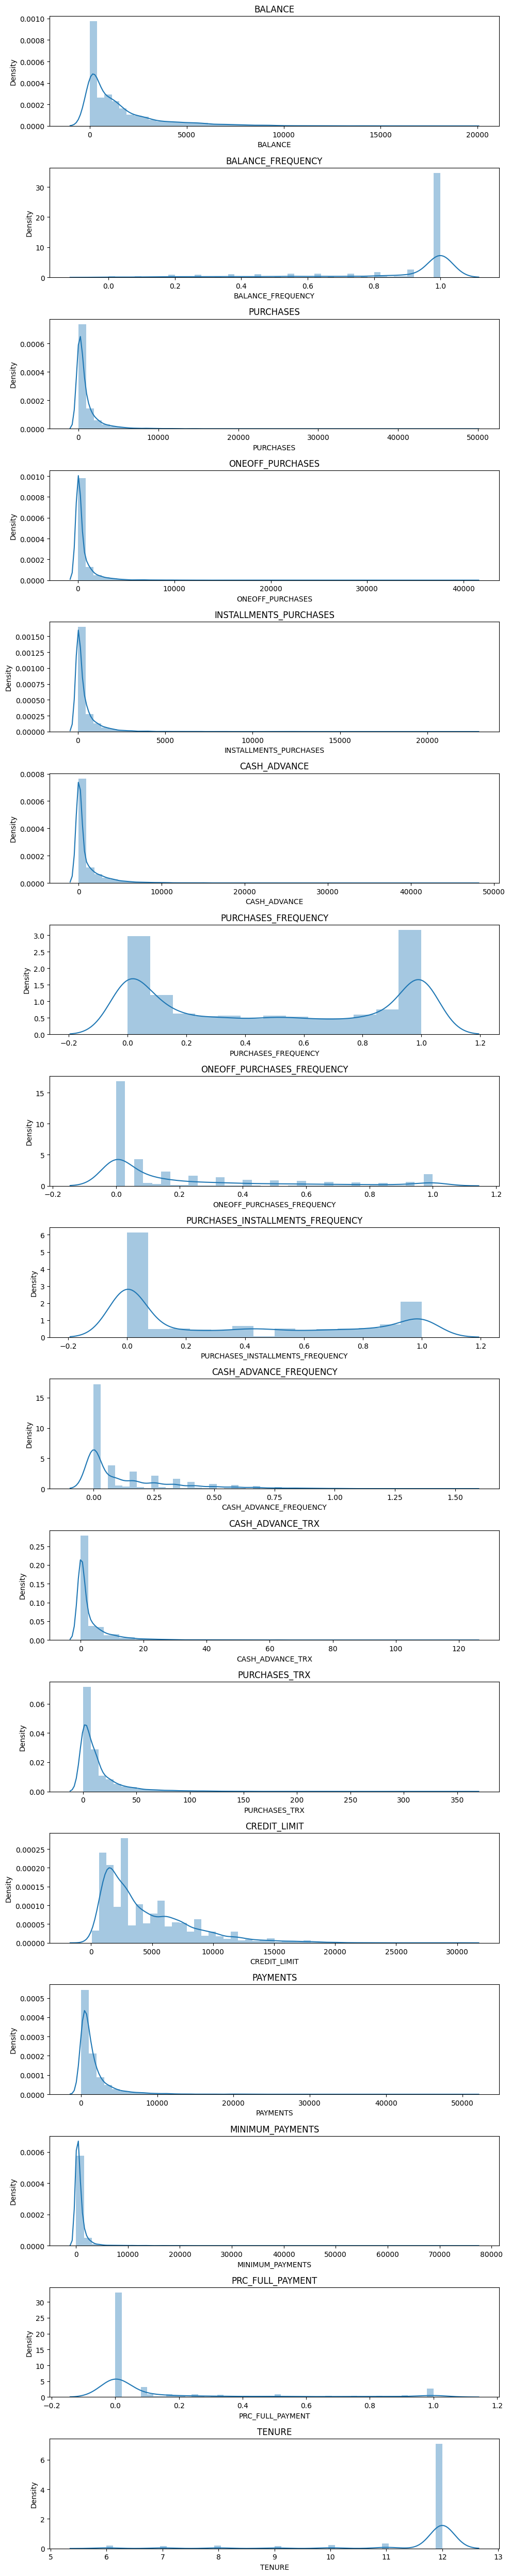

In [21]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

Verificando as correlações do dataset

* 0.9 para mais ou para menos indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0 a 0.3 positivo ou negativo indica uma correlação desprezível

In [22]:
correlations = creditcard_df.corr()

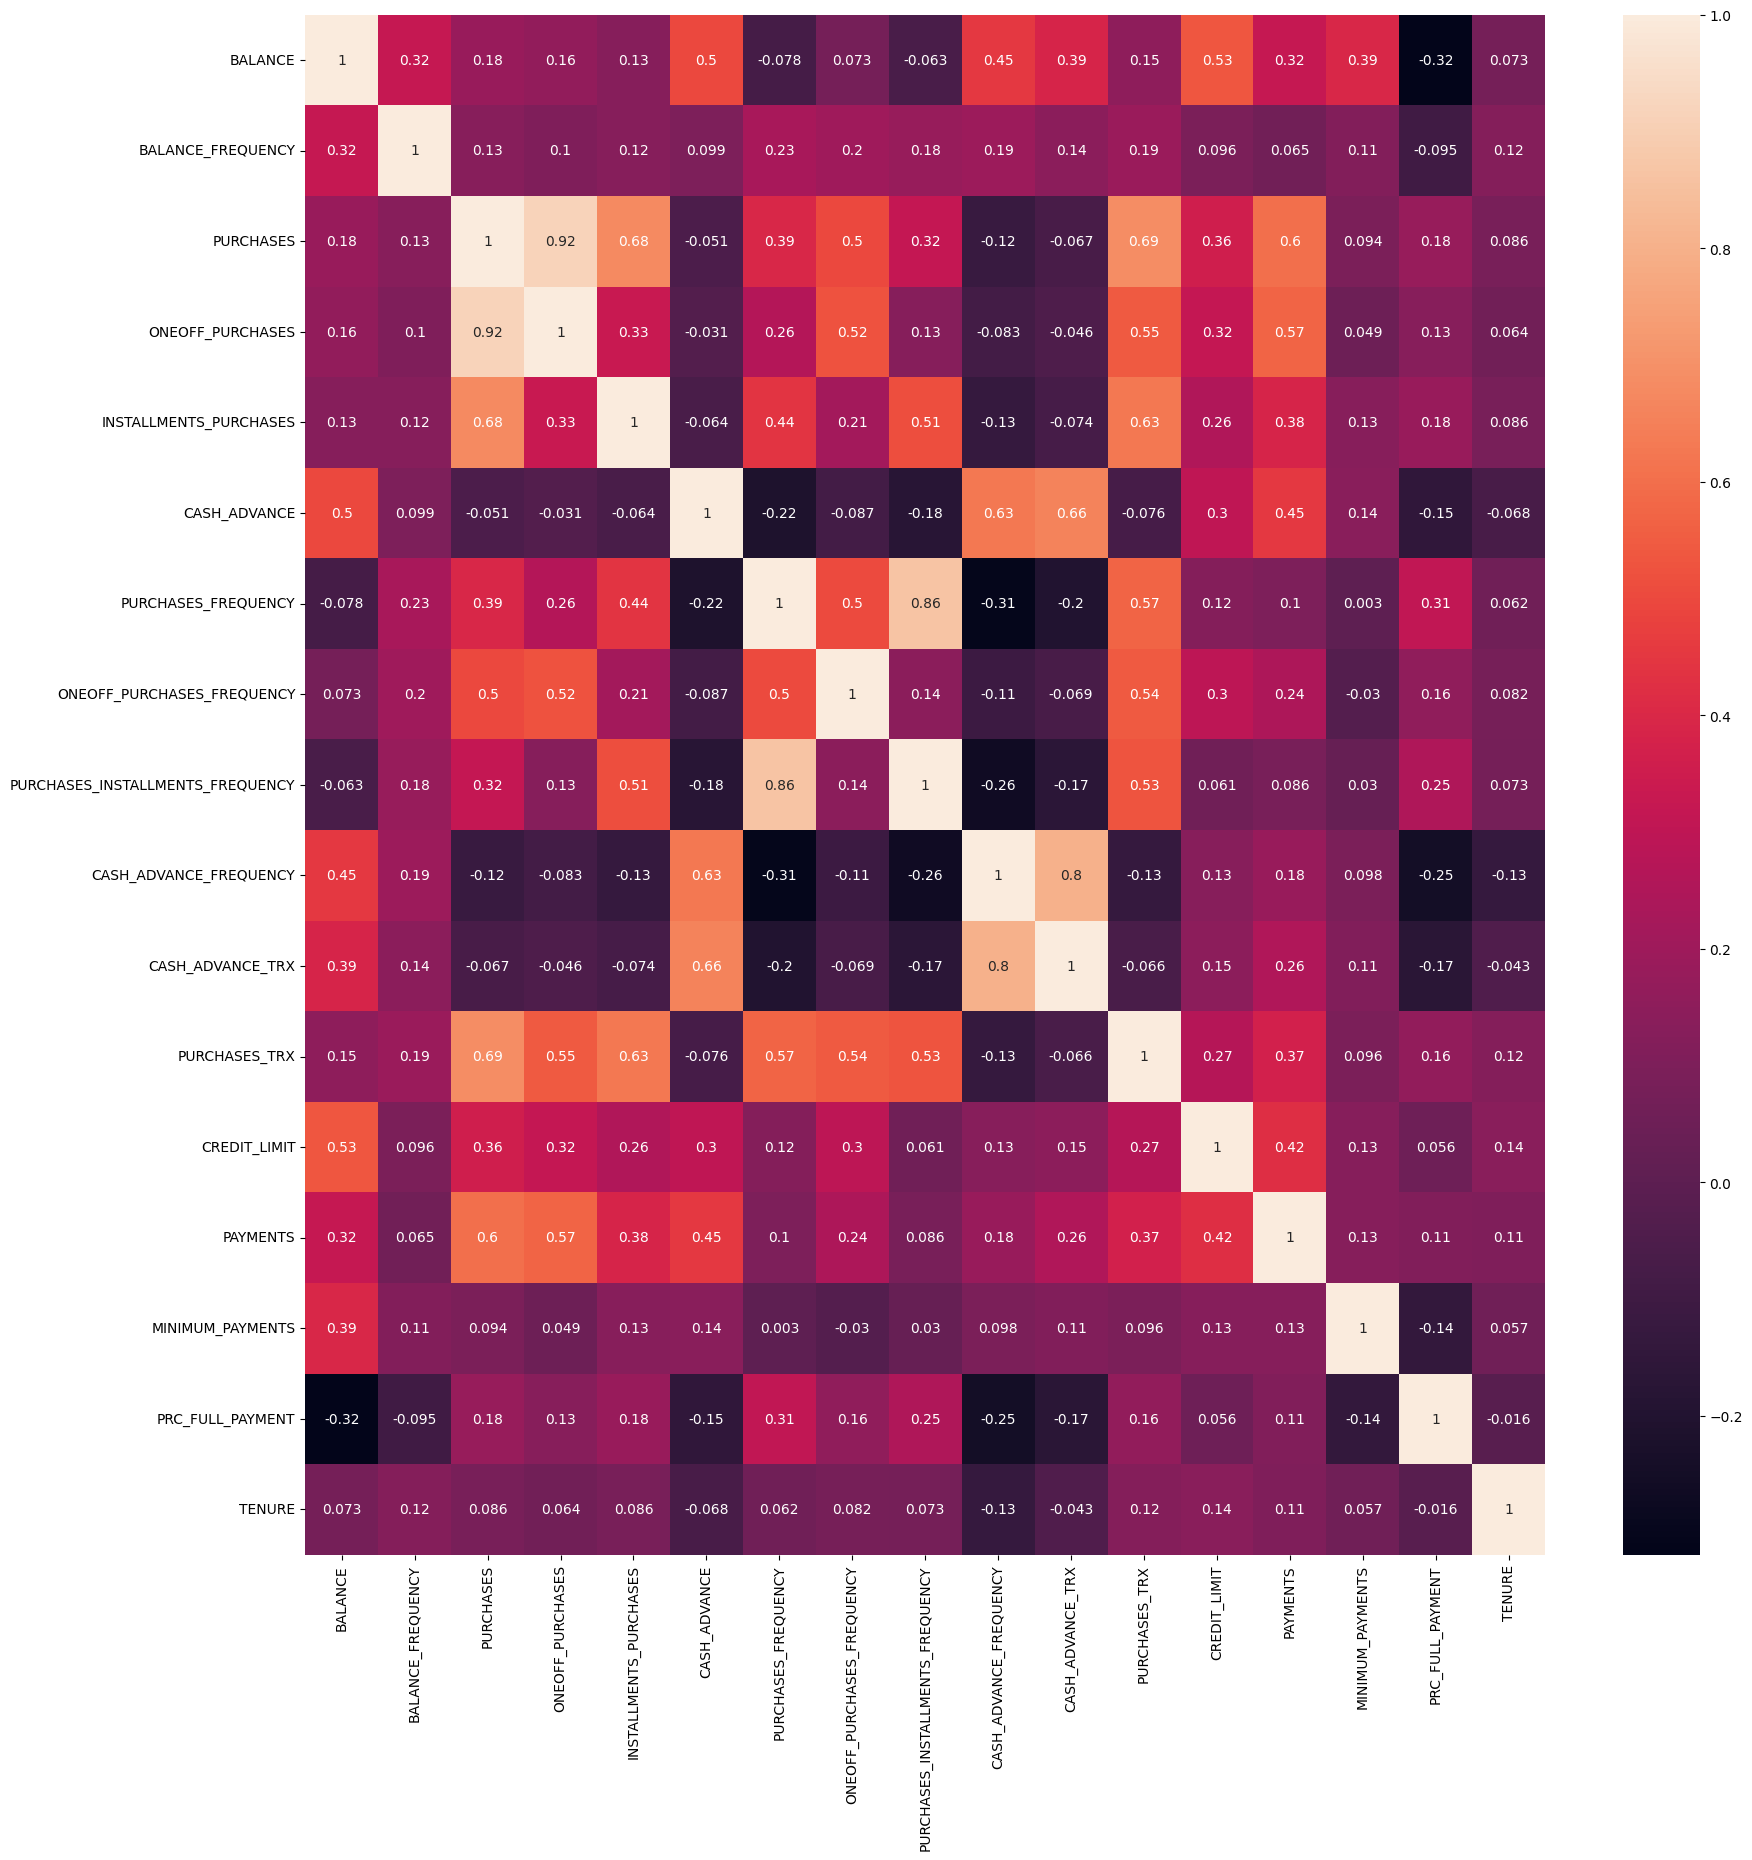

In [23]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

--Correlações Interesssantes

* 'PURCHASES' e 'ONEOFF_PURCHASES'.(Grande parte das compras dos clientes vem de compras á vista)

* 'PURCHASES_FREQUENCY' e 'PURCHASES_INSTALLMENTS_FREQUENCY'.(Quanto mais compras maior a tendência de parcelar a compra)

* 'CREDIT_LIMIT' e 'BALANCE'.(Conforme mais dinheiro na conta maior o limite do cartão de crédito)

* 'BALANCE' e 'PRC_FULL_PAYMENT'.(Quanto menos dinheiro na conta o cliente tem uma leve tendência a pagar menos da fatura\)



## Definição do número de clusters usando o Elbow Method

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

Dados em escalas diferentes,vamos usar StandardScaler para padronizar os dados

In [24]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [25]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [26]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [27]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [28]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Usando o wlbow method para descobrir o melhor número de clusters

In [29]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

In [30]:
print(wcss_1)

[152150.00000000006, 127784.97295116566, 111986.74707959311, 99073.93826774818, 91503.39081843373, 84851.10583563076, 79756.50009902427, 74490.1414554564, 69831.78463283302, 66466.43991536203, 63642.383376326776, 61357.00308099089, 59169.71526906312, 57507.857272908914, 55858.4321395898, 54726.12411930258, 53347.07805598245, 51921.63633400007, 50837.11584392676]


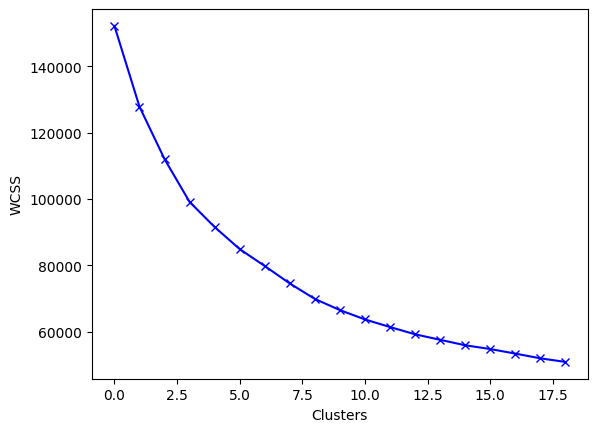

In [31]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Agrupamento com k-means

o gráfico se establiza perto do cluster 8

In [32]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
labels, len(labels)

(array([2, 6, 1, ..., 7, 7, 7]), 8950)

quantidade de registro por cluster

In [34]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1181, 1104, 2718, 2016,   30,  420,  859,  622], dtype=int64))

In [35]:
kmeans.cluster_centers_

array([[-7.01253042e-01, -2.14155973e+00, -3.11047076e-01,
        -2.35564512e-01, -3.02577536e-01, -3.22149896e-01,
        -5.55955163e-01, -4.43020853e-01, -4.40182510e-01,
        -5.21105180e-01, -3.76271667e-01, -4.19604494e-01,
        -1.77998391e-01, -2.02448675e-01, -2.56774496e-01,
         2.80447805e-01,  1.99472690e-01],
       [-1.62601241e-01,  3.92179240e-01,  4.64655308e-01,
         6.06992510e-01, -1.66320971e-02, -3.32621349e-01,
         9.42818319e-01,  1.87803040e+00,  9.03610528e-02,
        -4.06452483e-01, -3.22631846e-01,  5.29433335e-01,
         3.84112643e-01,  9.43311045e-02, -1.62193144e-01,
         4.06784370e-01,  2.61182756e-01],
       [ 2.03511065e-02,  4.04043243e-01, -3.62376544e-01,
        -2.47500923e-01, -4.02018496e-01, -8.61404177e-02,
        -8.69110466e-01, -4.11369131e-01, -7.60040928e-01,
         1.15906691e-01, -2.04498628e-02, -4.87561547e-01,
        -3.05509865e-01, -2.47915501e-01, -3.22876628e-03,
        -4.56435696e-01,  2.7

In [36]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701253,-2.141560,-0.311047,-0.235565,-0.302578,-0.322150,-0.555955,-0.443021,-0.440183,-0.521105,-0.376272,-0.419604,-0.177998,-0.202449,-0.256774,0.280448,0.199473
1,-0.162601,0.392179,0.464655,0.606993,-0.016632,-0.332621,0.942818,1.878030,0.090361,-0.406452,-0.322632,0.529433,0.384113,0.094331,-0.162193,0.406784,0.261183
2,0.020351,0.404043,-0.362377,-0.247501,-0.402018,-0.086140,-0.869110,-0.411369,-0.760041,0.115907,-0.020450,-0.487562,-0.305510,-0.247916,-0.003229,-0.456436,0.272429
3,-0.366541,0.333613,-0.038954,-0.244358,0.356637,-0.363772,0.988918,-0.386940,1.204105,-0.475444,-0.361371,0.186089,-0.261402,-0.218295,-0.046278,0.313708,0.257637
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,0.922183,0.467535,2.256660,1.722274,2.171760,-0.195314,1.160307,1.552162,1.245501,-0.313553,-0.211258,2.785144,1.225536,1.285330,0.567968,0.290267,0.333992
6,1.697017,0.392762,-0.216883,-0.155459,-0.227280,2.030839,-0.475027,-0.211362,-0.412621,1.929607,1.947921,-0.265397,1.037787,0.828099,0.515820,-0.392020,0.068925
7,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733


- Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [37]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.875814,0.369955,338.647961,201.448528,137.450533,303.307732,0.267219,0.070296,0.189498,0.030866,0.681049,4.280034,3846.818481,1147.074774,265.804410,0.235741,11.784264
1,1226.034069,0.970174,1995.948062,1599.920616,396.027446,281.348606,0.868749,0.762711,0.400349,0.053809,1.047101,27.869565,5892.008399,2006.223157,486.222262,0.272692,11.866848
2,1606.833938,0.972985,228.981762,181.636531,47.527307,798.230633,0.141535,0.079738,0.062378,0.158338,3.109272,2.590876,3382.879568,1015.452769,856.682039,0.020215,11.881898
3,801.549796,0.956301,919.979435,186.852698,733.569831,216.024183,0.887251,0.087026,0.842980,0.040003,0.782738,19.335317,3543.363195,1101.201232,756.357081,0.245469,11.862103
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,3483.920087,0.988026,5824.593571,3451.058643,2374.963500,569.288263,0.956038,0.665498,0.859431,0.072399,1.807143,83.938095,8953.452381,5454.047925,2187.831486,0.238613,11.964286
6,5096.672741,0.970312,539.830140,334.407483,205.541154,5237.635714,0.299699,0.139404,0.200451,0.521278,16.541958,8.113054,8270.343293,4130.409426,2066.303355,0.039056,11.609557
7,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904


In [38]:
labels, len(labels)

(array([2, 6, 1, ..., 7, 7, 7]), 8950)

In [39]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


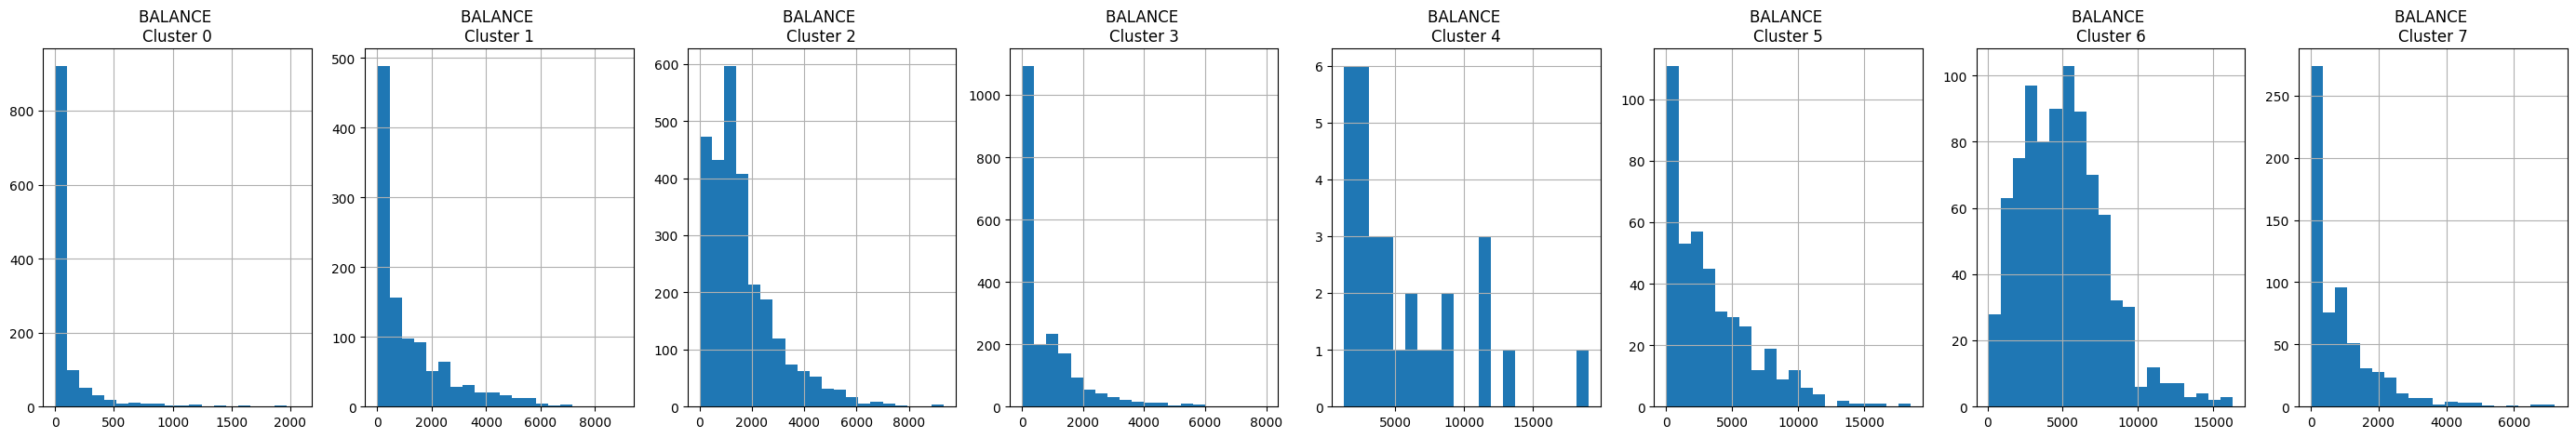

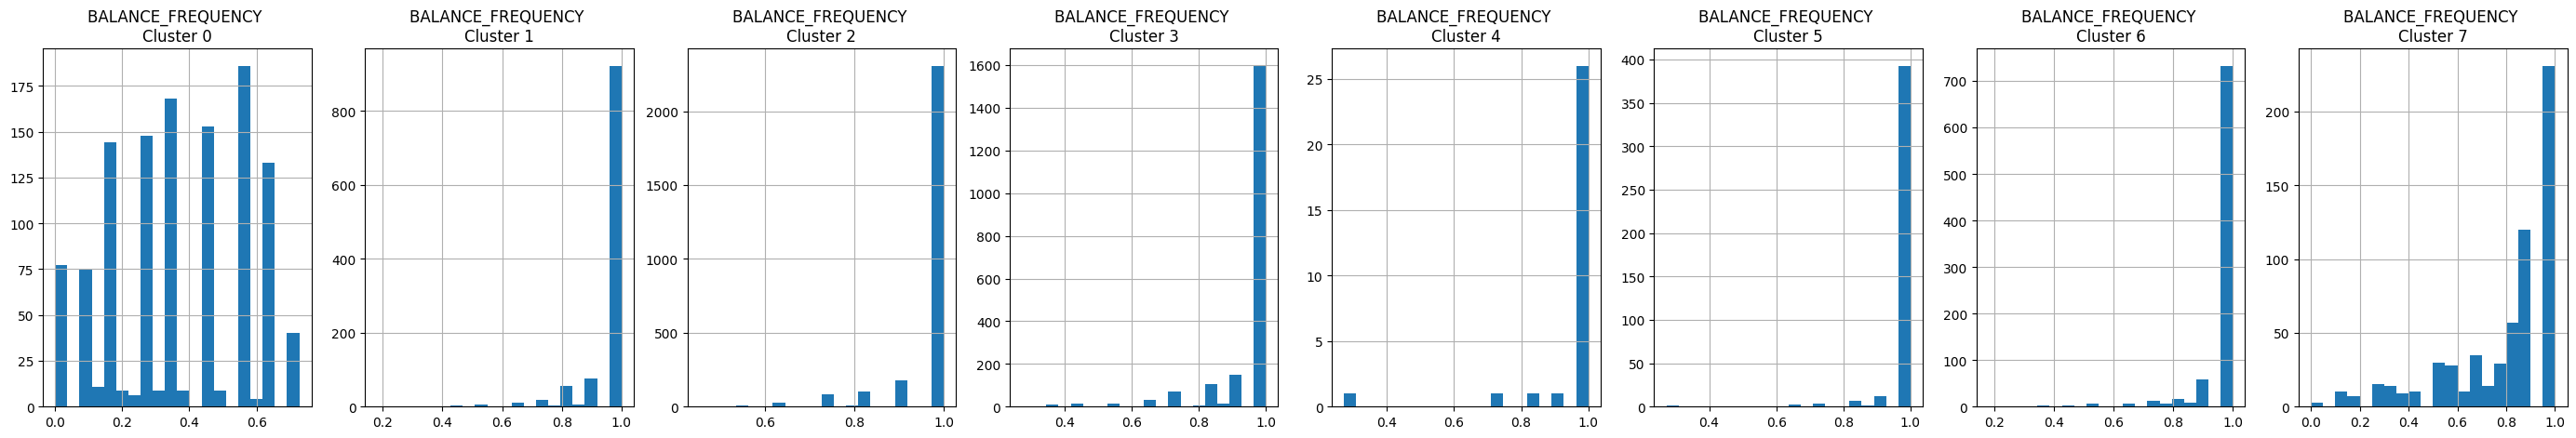

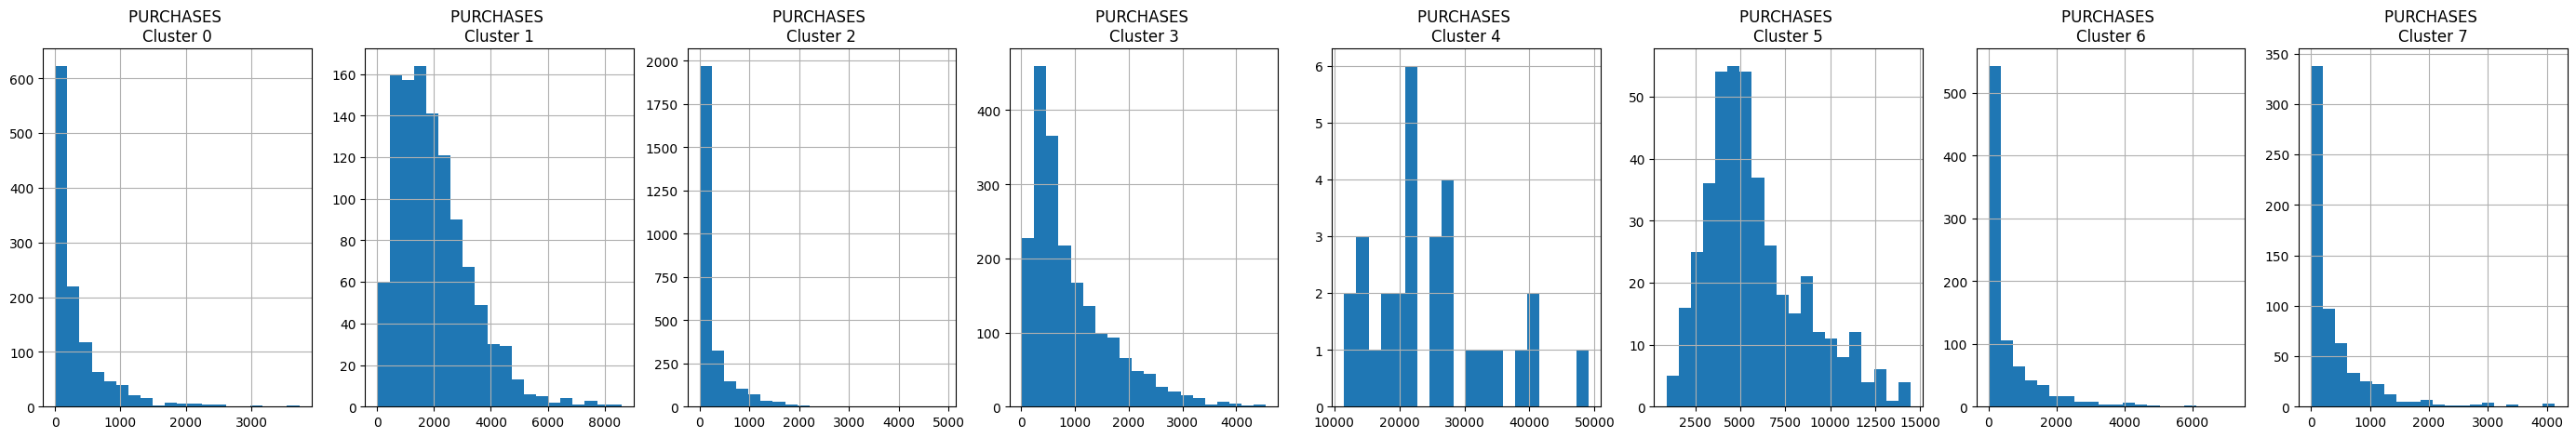

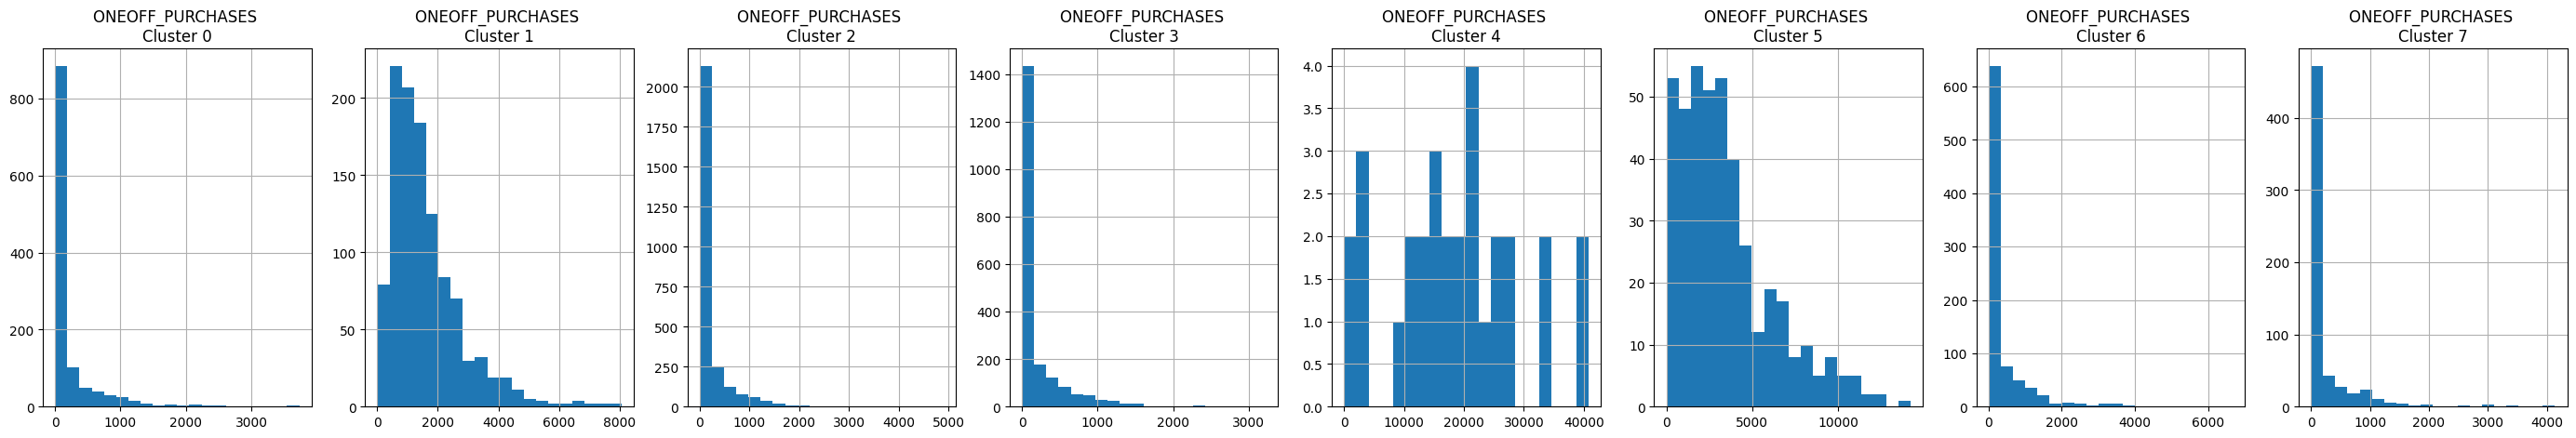

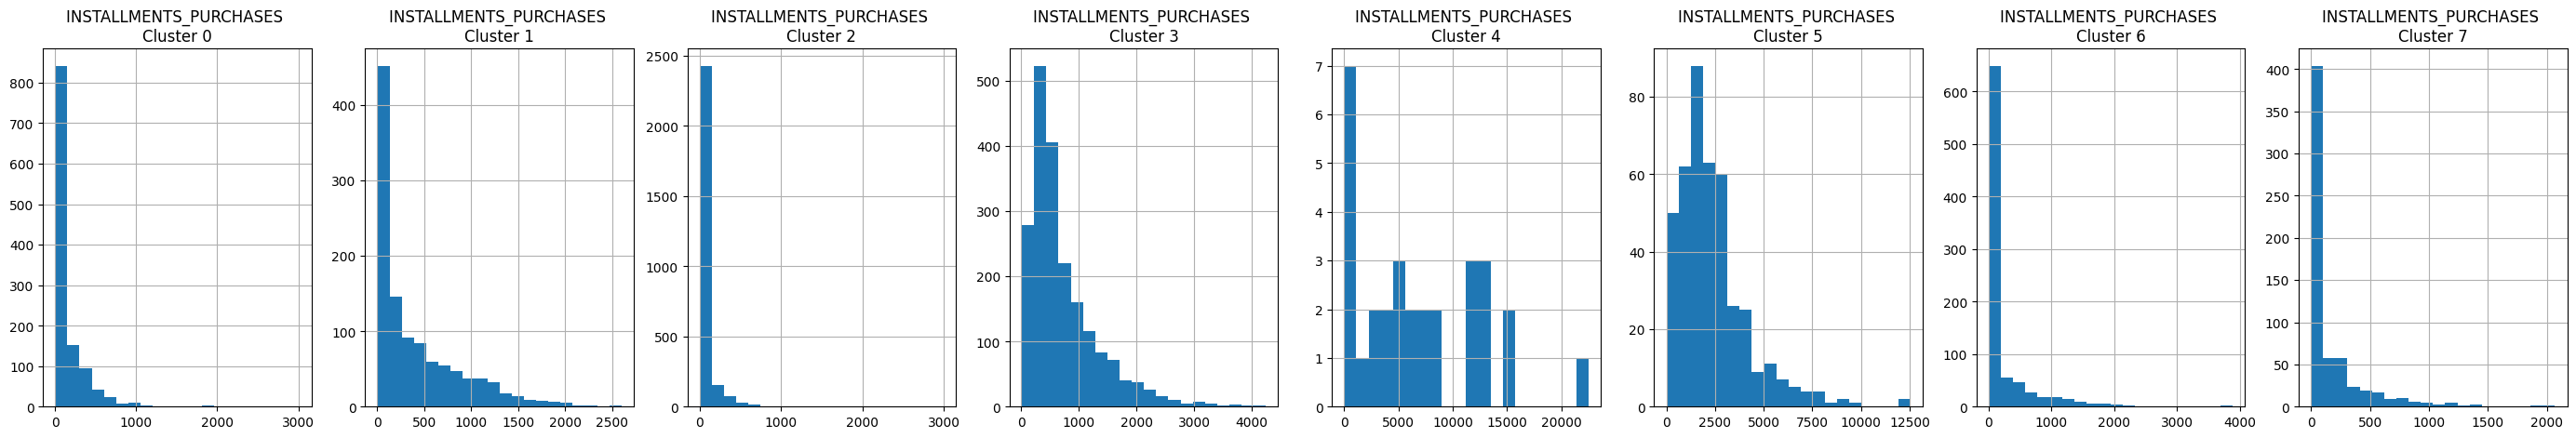

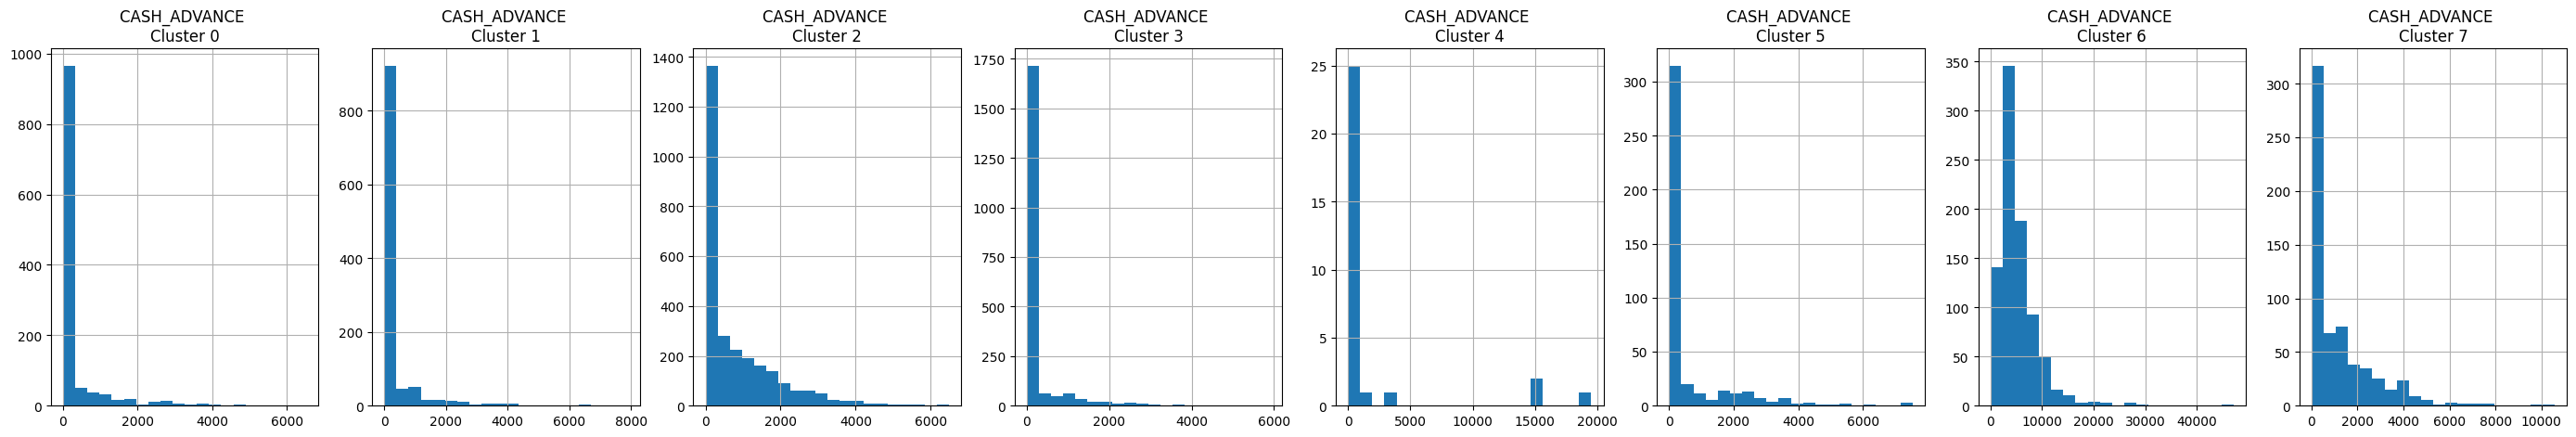

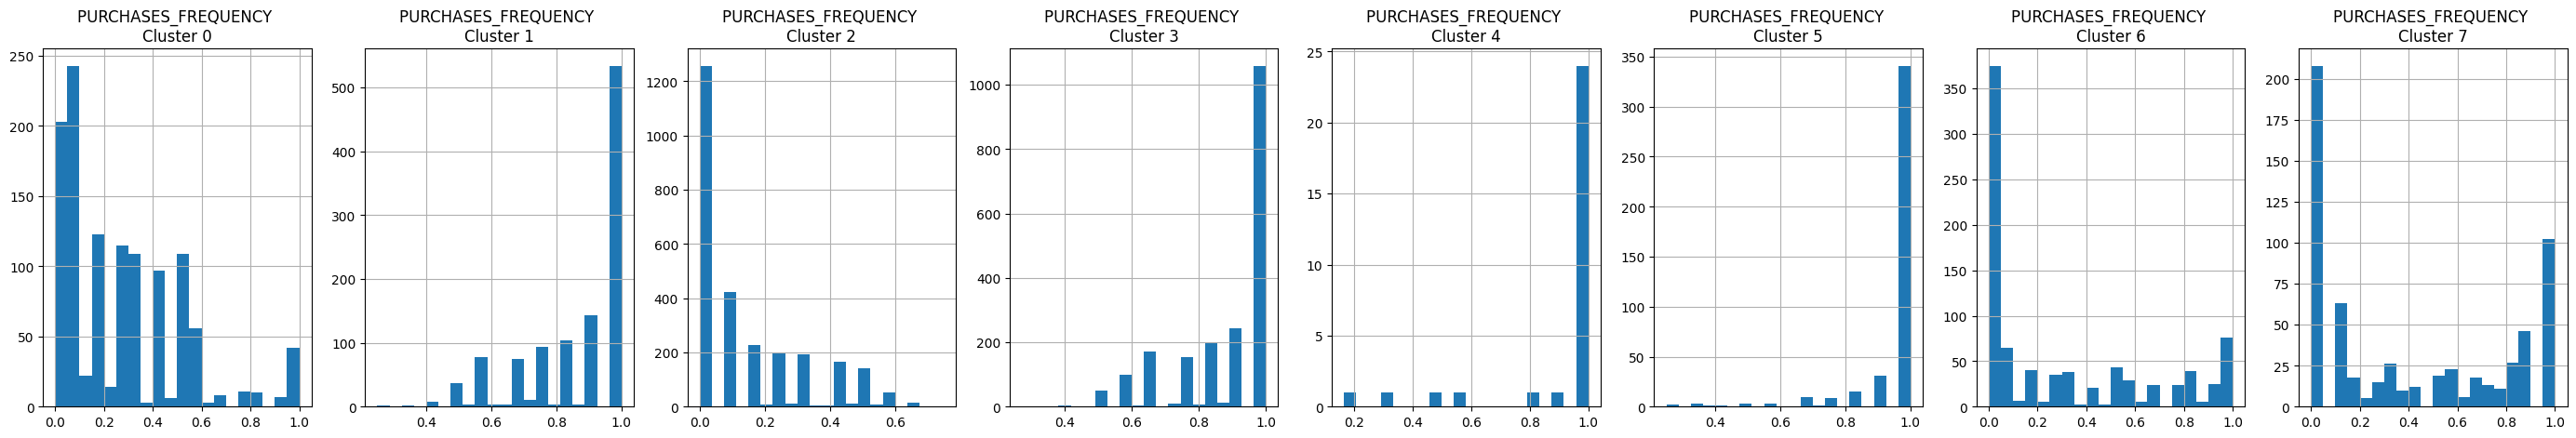

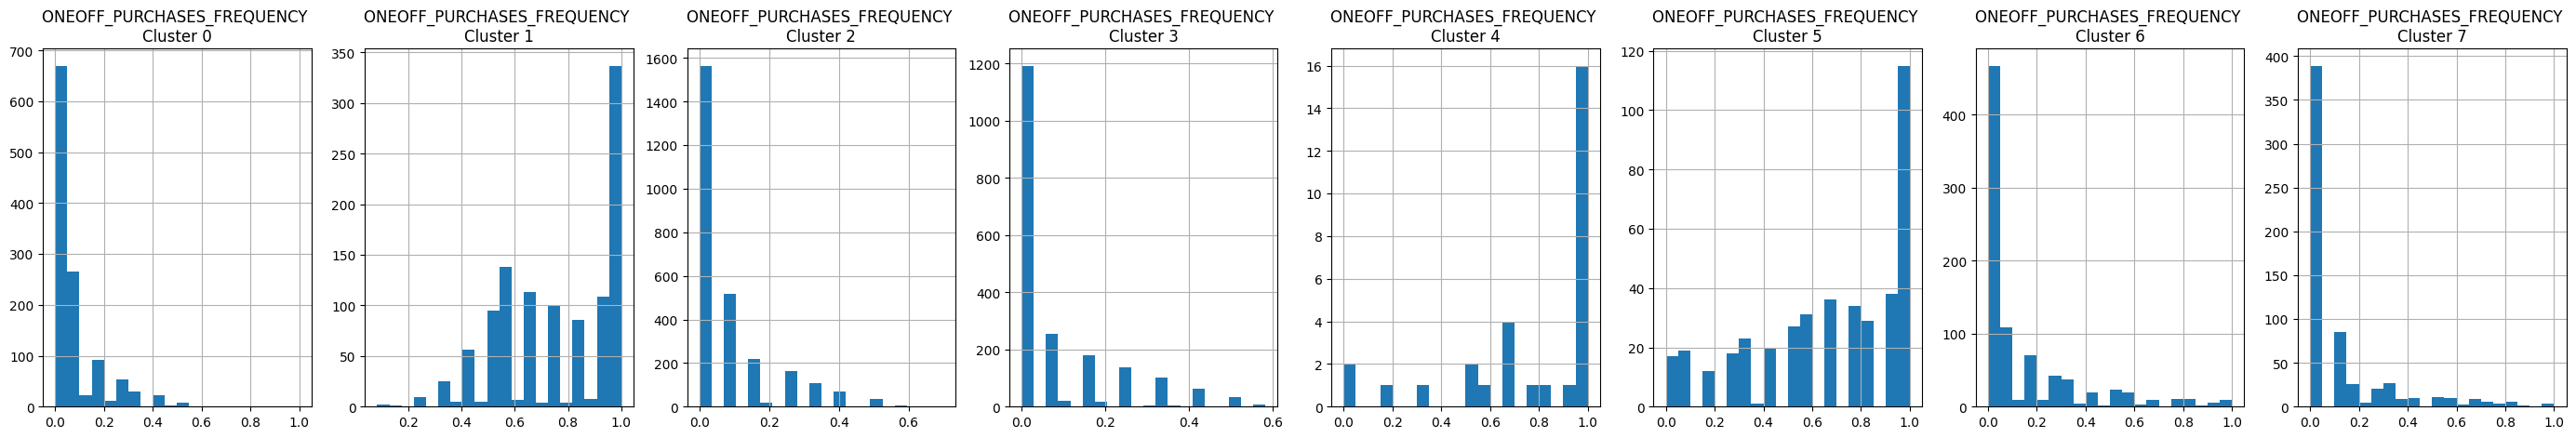

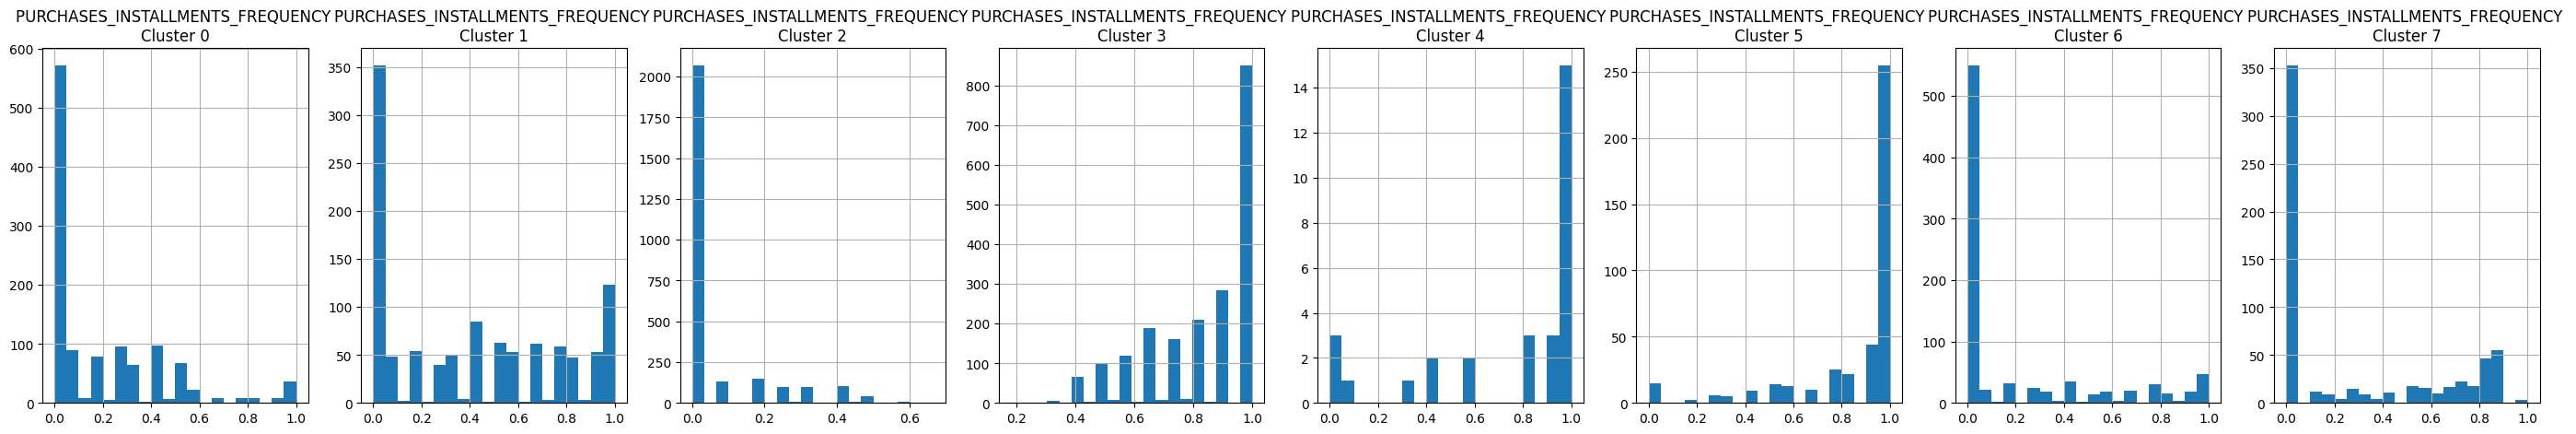

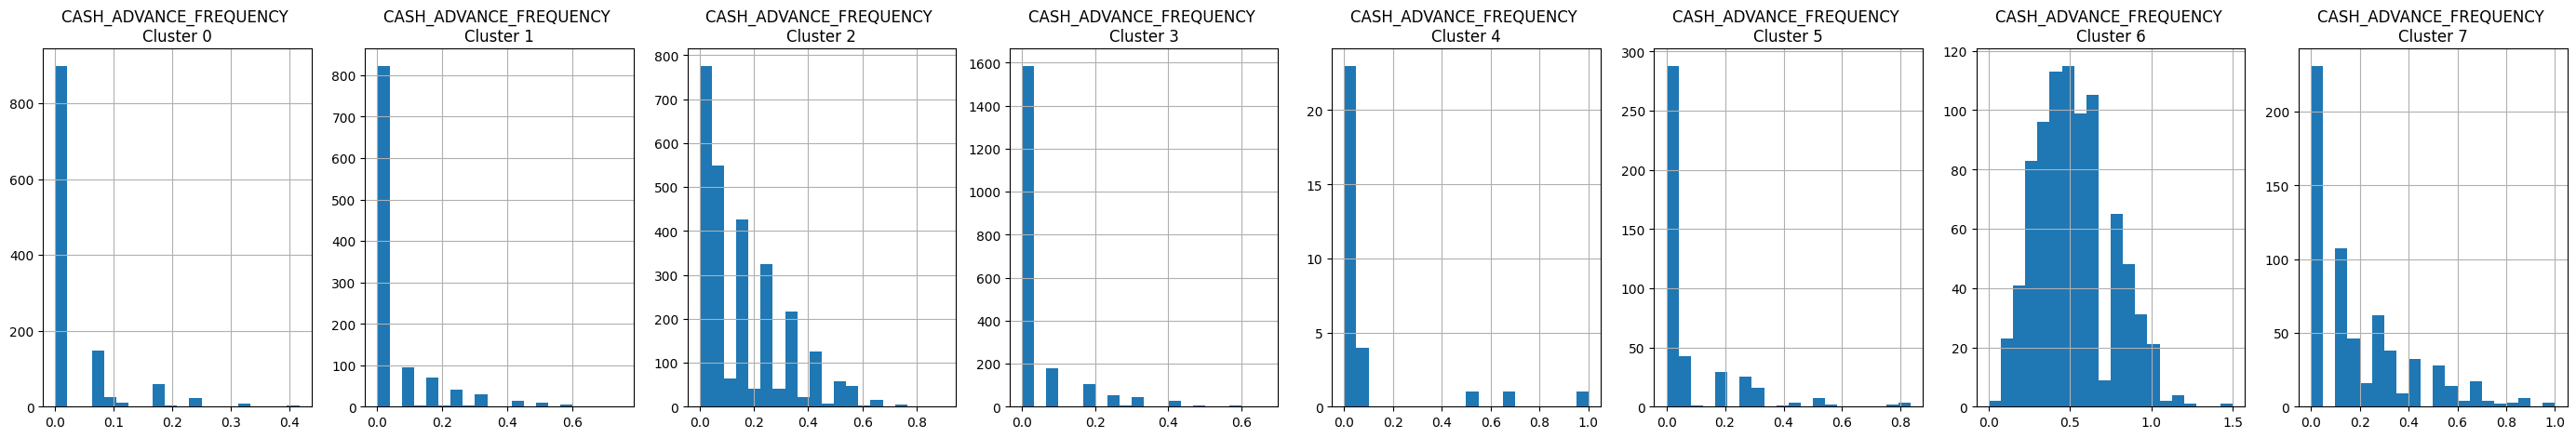

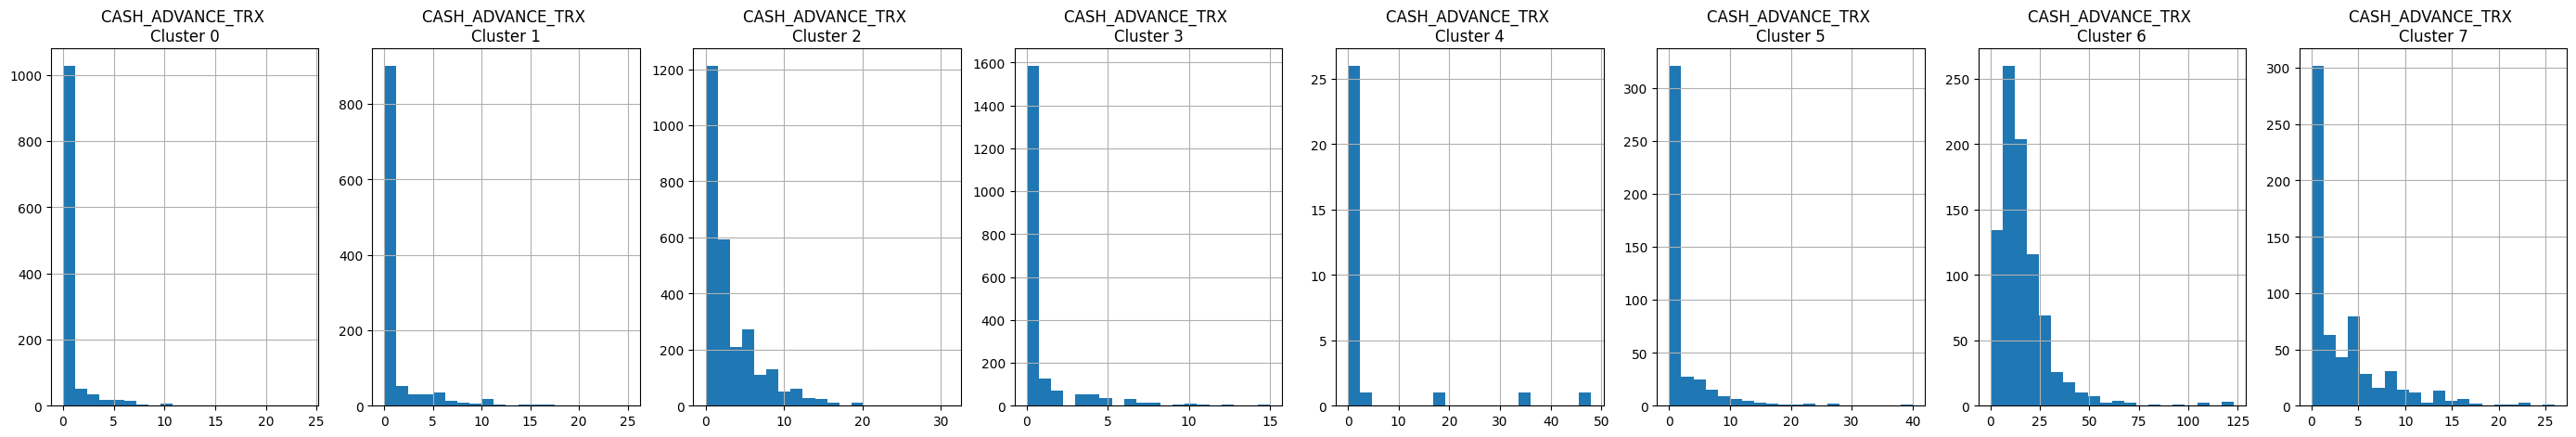

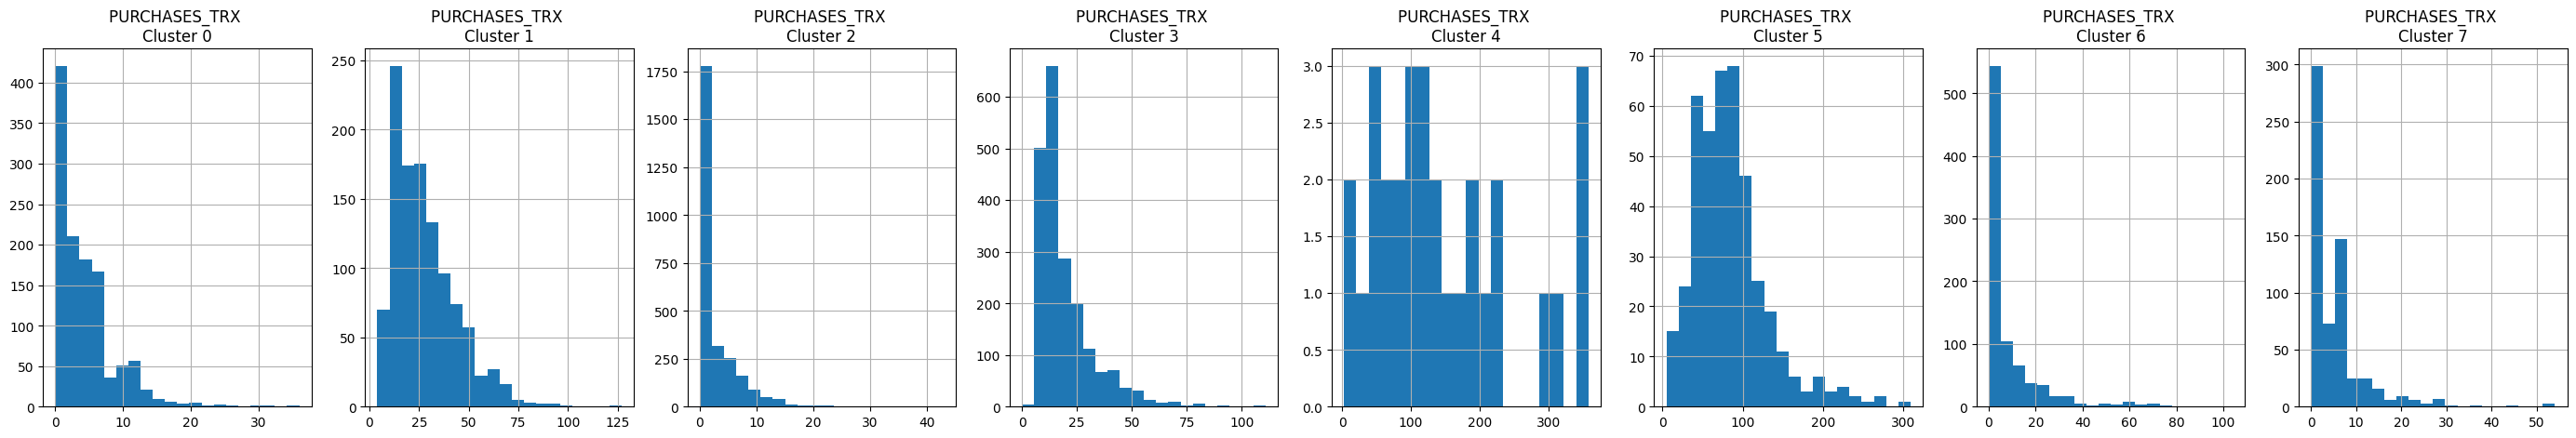

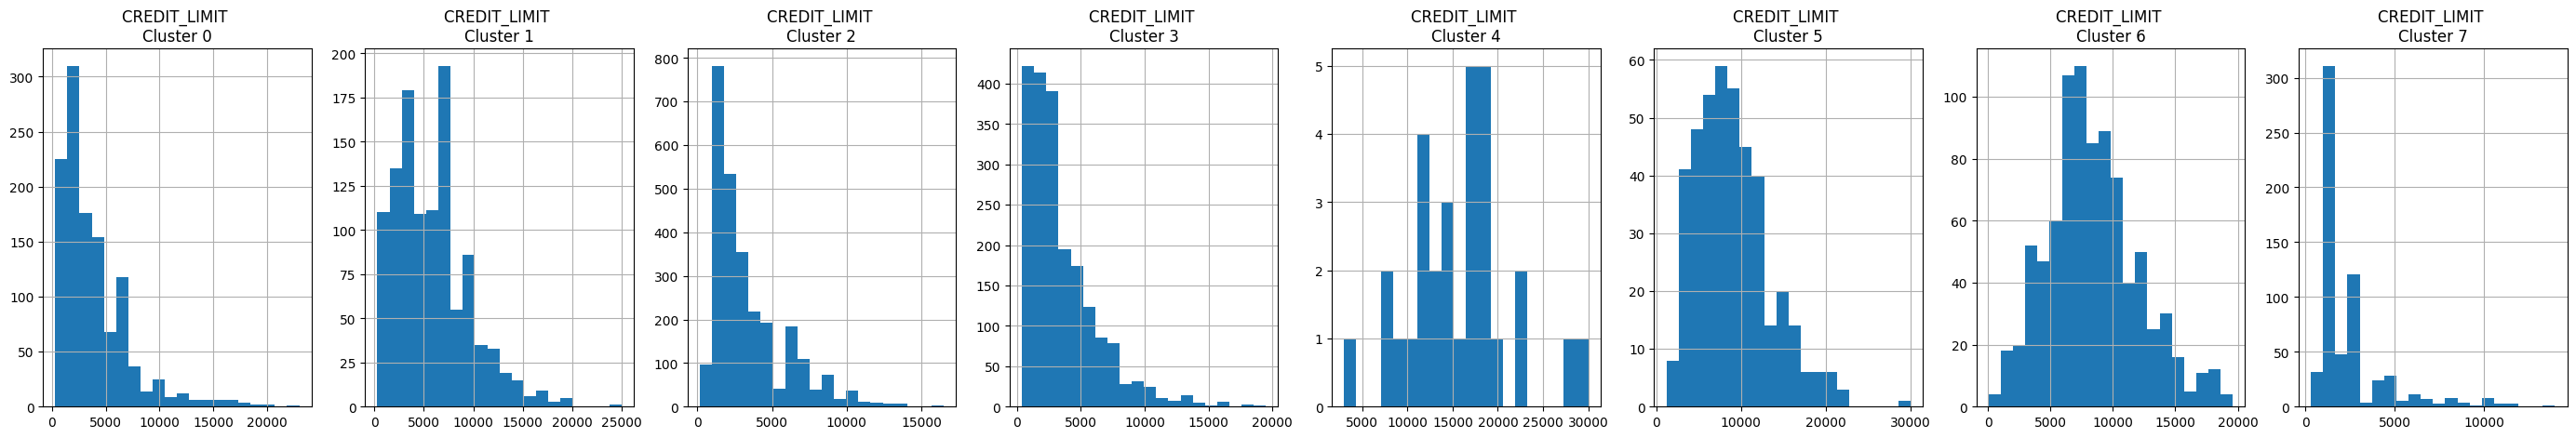

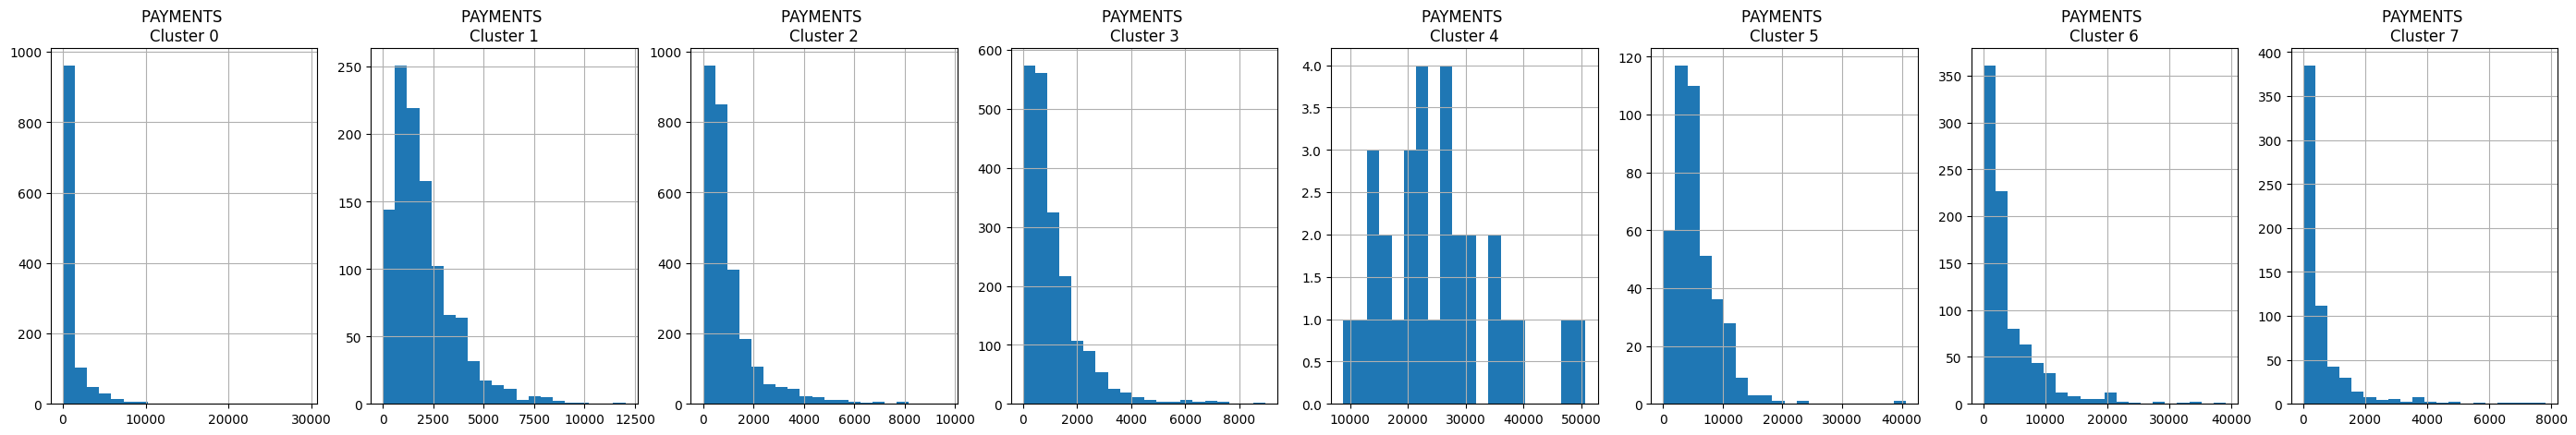

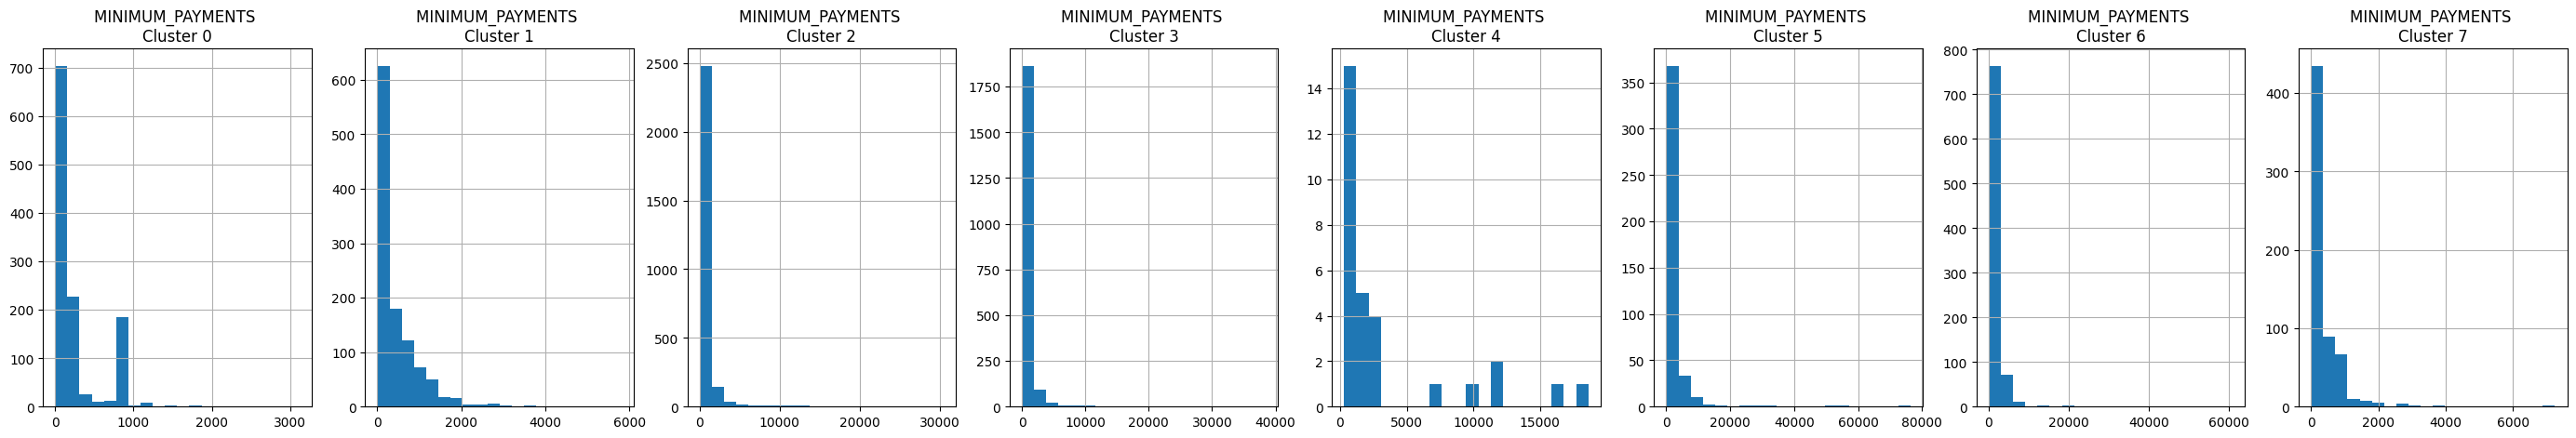

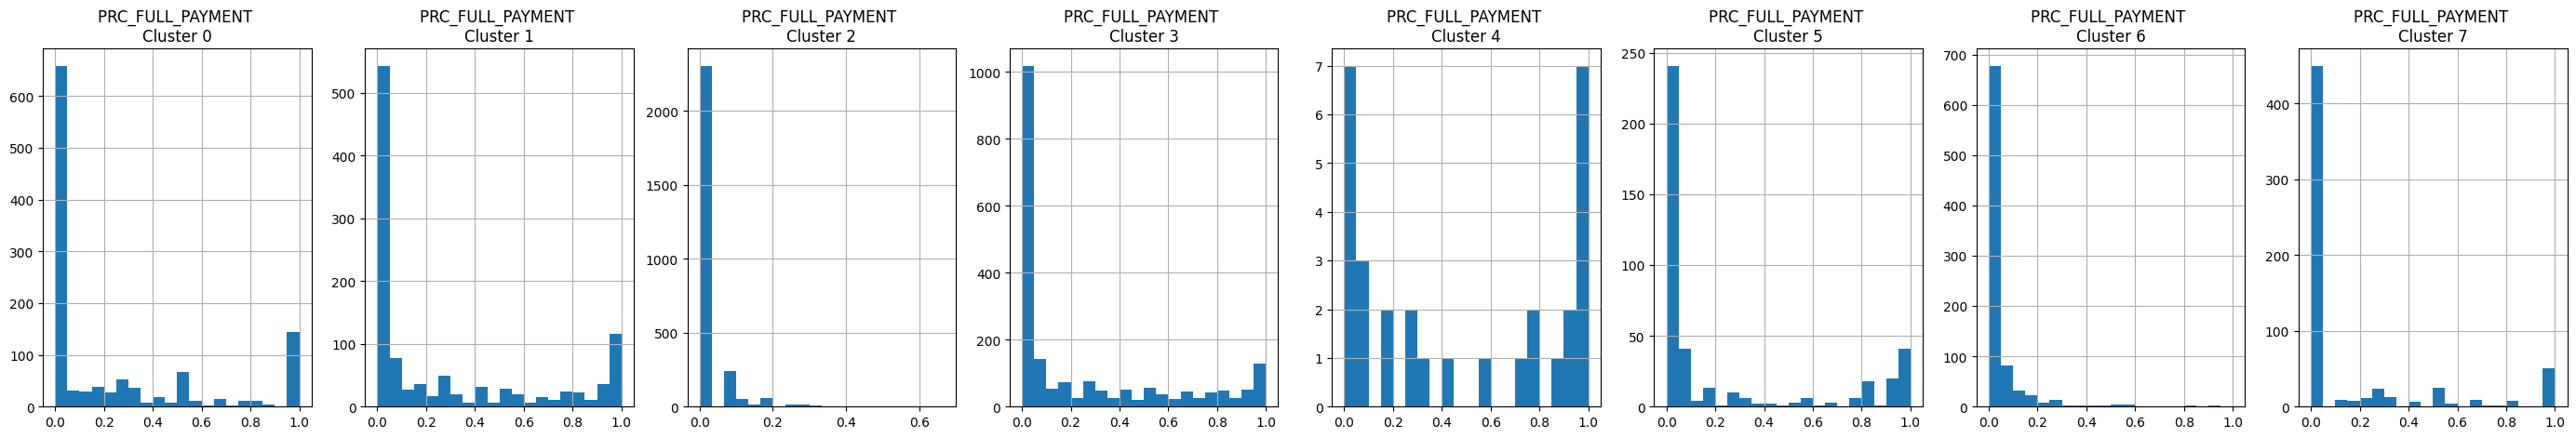

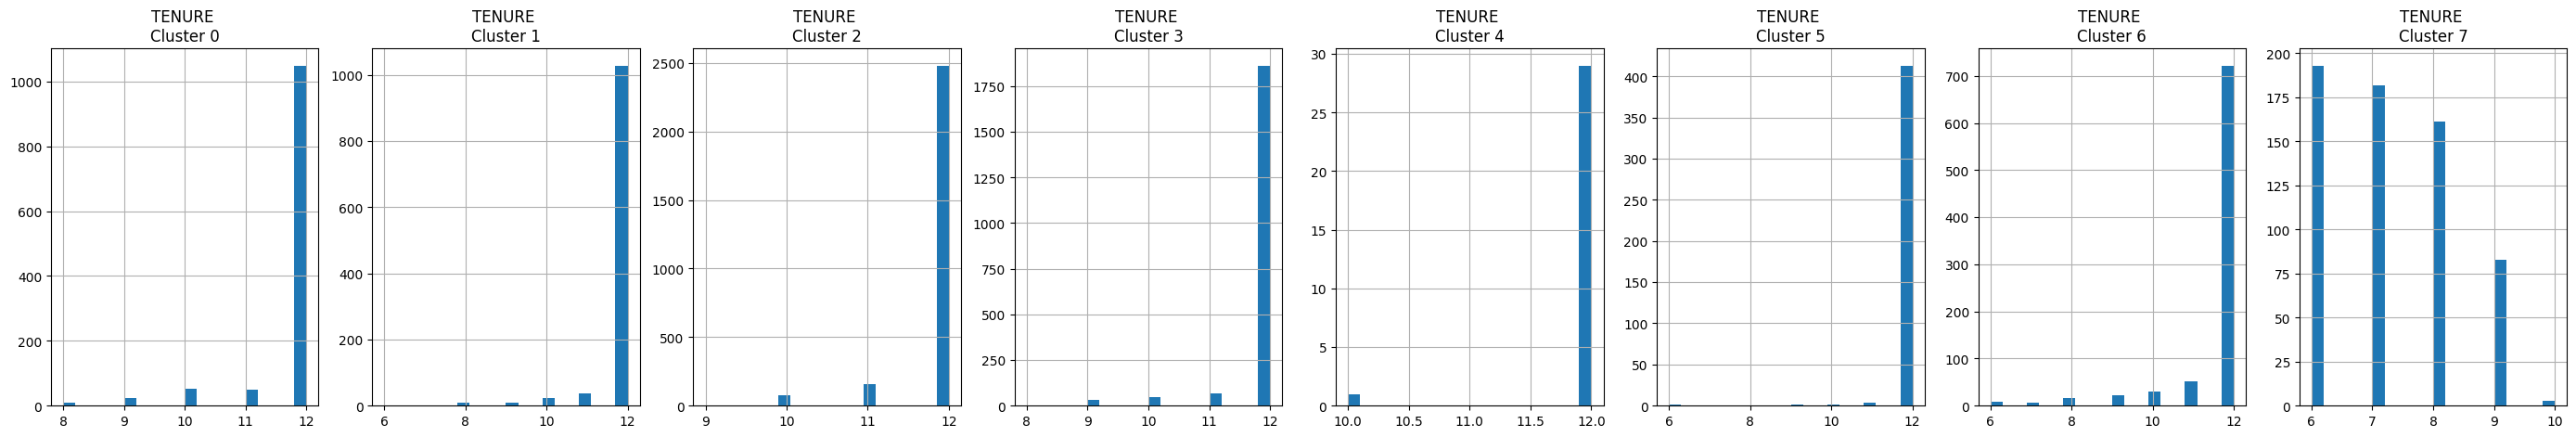

In [40]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [41]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3827,14.836268,0.545455,170.09,0.0,170.09,0.00000,0.454545,0.000000,0.454545,0.000000,0,10,7000.0,190.956987,73.377488,0.50,11,0
1417,19.945714,0.272727,170.00,170.0,0.00,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,6500.0,734.613034,166.057617,1.00,12,0
6915,350.819852,0.363636,0.00,0.0,0.00,1056.46058,0.000000,0.000000,0.000000,0.083333,3,0,1200.0,119.701887,340.789604,0.00,12,0
6919,20.426090,0.272727,114.00,114.0,0.00,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,4000.0,520.598144,99.093617,0.00,12,0
6920,4.045339,0.363636,35.00,0.0,35.00,0.00000,0.166667,0.000000,0.166667,0.000000,0,2,7500.0,122.129596,110.576473,0.25,12,0


In [42]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8324,1094.961929,1.000000,498.21,0.00,498.21,1188.796657,1.000000,0.000000,0.875000,0.500000,8,14,1200.0,460.368166,1643.554755,0.0,8,7
3470,2499.228939,1.000000,217.37,0.00,217.37,5197.145458,0.833333,0.000000,0.666667,0.500000,3,11,10000.0,360.742975,372.143566,0.0,6,7
2479,3.847042,0.500000,182.08,0.00,182.08,0.000000,1.000000,0.000000,0.875000,0.000000,0,8,1500.0,191.067061,54.734326,0.5,8,7
8314,636.560481,0.666667,202.77,181.61,21.16,1148.569187,0.500000,0.333333,0.166667,0.500000,9,5,1500.0,76.573549,128.452063,0.0,6,7
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,7


In [43]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

Reduzindo os componentes de 17 para 2,com o PCA,um outro metodo para achar eoutros números de clusters,sendo assim novos insights podem ser gerados

In [44]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.6822204 , -1.07644807],
       [-1.13829569,  2.50649209],
       [ 0.96968355, -0.38352119],
       ...,
       [-0.92620357, -1.81078816],
       [-2.3365509 , -0.65797384],
       [-0.55642143, -0.40047619]])

Não temos como saber o que siginifica esse pca1 e pca2,pois são uma mistura de todos os componentes do dataset.

In [45]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076448
1,-1.138296,2.506492
2,0.969684,-0.383521
3,-0.873628,0.043173
4,-1.599434,-0.688581


In [46]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head(20)

,pca1,pca2,cluster
0,-1.682220,-1.076448,2
1,-1.138296,2.506492,6
2,0.969684,-0.383521,1
3,-0.873628,0.043173,2
4,-1.599434,-0.688581,2


<AxesSubplot: xlabel='pca1', ylabel='pca2'>

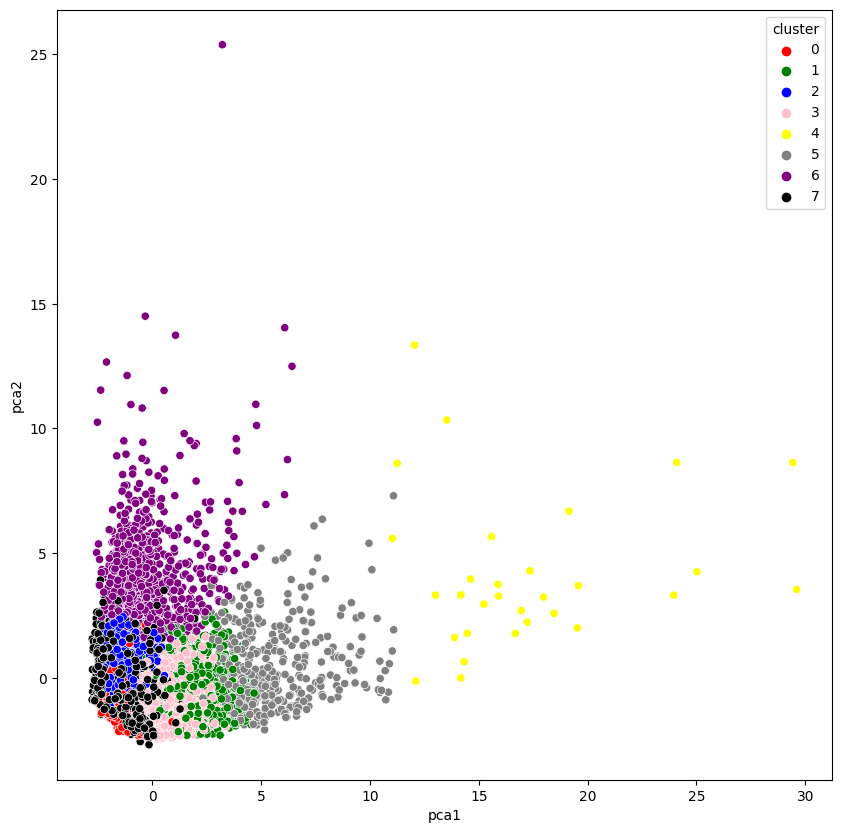

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

In [48]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [49]:
creditcard_df_scaled.shape

(8950, 17)

Na técnica do autoencoders a gente começa com 17 componentes,vamos mudar a dimensão aumentando o número de componentes para 500 e depois para 2000,e depois diminuimos para 10.Depois revertemos para 17 de novo caso queira usar novamente,mas nessa caso queremos usar o enocded nao o decoded

In [50]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [51]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [52]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [53]:
# encoder
encoder = Model(input_df, encoded)

Treinando o modelo com o autoencoder

In [54]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [55]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 10s 29ms/step - loss: 0.2027
Epoch 2/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0903
Epoch 3/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0615
Epoch 4/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0716
Epoch 5/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0767
Epoch 6/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0613
Epoch 7/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0366
Epoch 8/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0375
Epoch 9/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0381
Epoch 10/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0407
Epoch 11/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0535
Epoch 12/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0379
Epoch 13/50


In [56]:
creditcard_df_scaled.shape

(8950, 17)

Aplicando o enconder após o treinamento

In [57]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 5ms/step


In [58]:
compact.shape

(8950, 10)

comparação entre o df normal e o df após encoder

In [59]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [60]:
compact[0]

array([0.        , 0.1570658 , 1.2579914 , 0.7878135 , 0.61579496,
       0.        , 0.5124836 , 0.        , 0.47921628, 0.2559168 ],
      dtype=float32)

Descobrindo o melhor valor de k para esse novo dataset

In [61]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

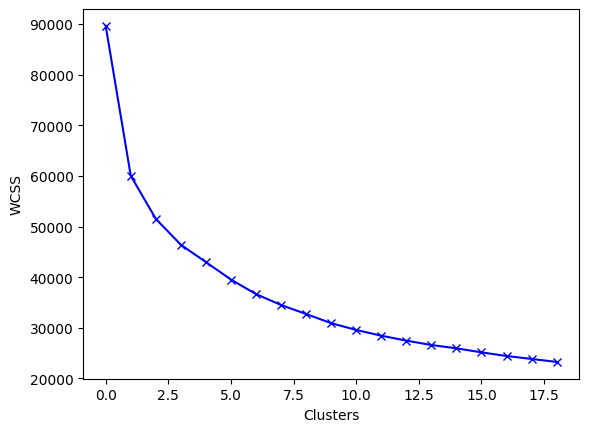

In [62]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

C:\Users\cvcam\AppData\Local\Temp\ipykernel_3524\1332322834.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, 'bx-', color = 'r')
C:\Users\cvcam\AppData\Local\Temp\ipykernel_3524\1332322834.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color = 'g');


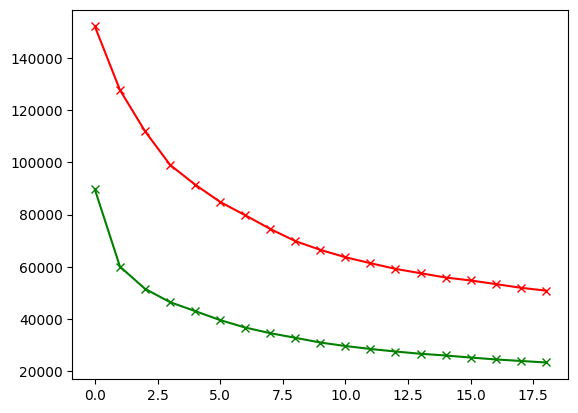

In [63]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [64]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [65]:
labels = kmeans.labels_
labels, labels.shape

(array([2, 3, 2, ..., 3, 0, 0]), (8950,))

In [66]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


Misturando o método autoencoder,elbow e pca,combinando esses métodos podemos ter uma precisão maior,em qual clusters os clientes fazem parte.

In [67]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.558141,-0.288892
1,0.797339,-1.091362
2,-0.724058,0.633948
3,1.102174,-0.472254
4,-1.477172,-0.190175


In [68]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.558141,-0.288892,2
1,0.797339,-1.091362,3
2,-0.724058,0.633948,2
3,1.102174,-0.472254,3
4,-1.477172,-0.190175,2


<AxesSubplot: xlabel='pca1', ylabel='pca2'>

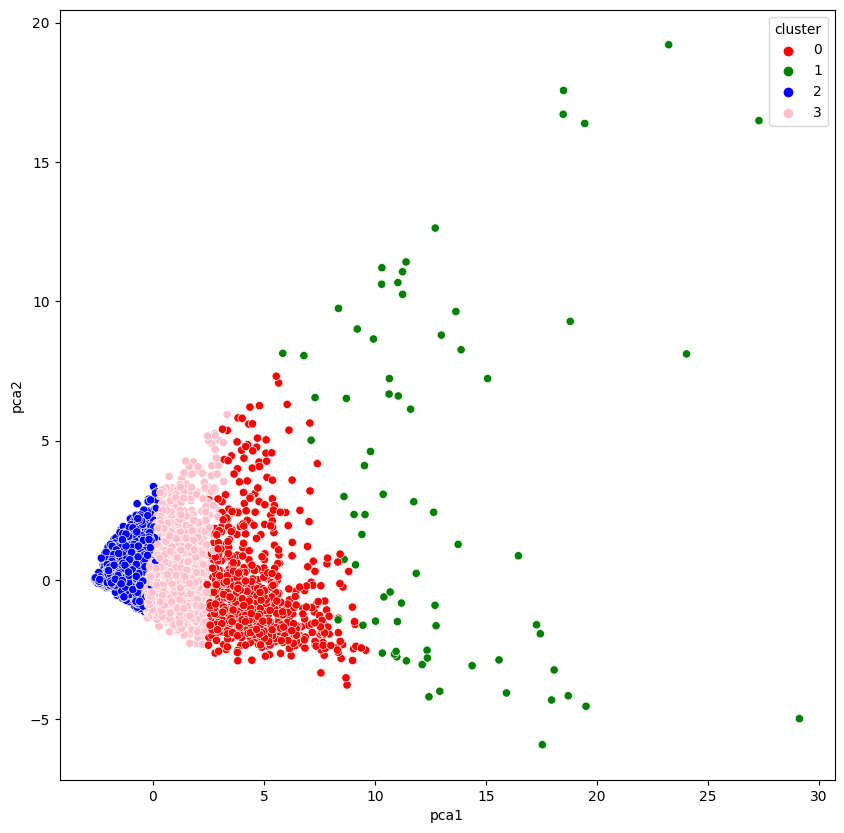

In [69]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

Deixando o dataset em ordem pelo qual cluster ele participa.

In [70]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,0
1971,1497.145968,0.875000,0.00,0.00,0.0,4444.646515,0.000000,0.000000,0.0,0.375000,8,0,2500.0,2986.360610,487.912459,0.166667,8,0
1962,1075.825135,1.000000,32.00,32.00,0.0,1859.421060,0.083333,0.083333,0.0,0.666667,23,1,9000.0,2266.903508,385.237167,0.000000,12,0
6676,1508.132993,0.750000,0.00,0.00,0.0,2418.319143,0.000000,0.000000,0.0,0.375000,11,0,2500.0,379.847536,444.160316,0.000000,8,0
6696,812.839893,0.875000,1160.09,932.09,228.0,3129.703318,0.875000,0.375000,0.5,0.875000,8,13,2000.0,4900.523879,197.894736,0.200000,8,0


In [71]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2338,3860.238072,1.000000,11.41,11.41,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,10000.0,7280.584479,1013.780486,0.083333,12,3
2333,25.379719,0.571429,179.00,0.00,179.0,0.000000,0.857143,0.000000,0.714286,0.000000,0,6,4000.0,308.793382,73.198450,0.000000,7,3
6212,3269.961382,1.000000,0.00,0.00,0.0,1722.645697,0.000000,0.000000,0.000000,0.416667,10,0,4000.0,949.187748,990.007312,0.000000,12,3
2352,4523.499003,1.000000,0.00,0.00,0.0,966.297398,0.000000,0.000000,0.000000,0.083333,2,0,9500.0,1348.018275,1101.578675,0.000000,12,3
4474,5256.695330,1.000000,188.60,188.60,0.0,1934.418697,0.083333,0.083333,0.000000,0.333333,4,1,9000.0,1421.954639,1452.249653,0.000000,12,3
